In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('train.csv')

In [2]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [3]:
def init_params():
    W1 = np.random.rand(16, 784) - 0.5
    b1 = np.random.rand(16, 1) - 0.5
    W2 = np.random.rand(16, 16) - 0.5
    b2 = np.random.rand(16, 1) - 0.5
    W3 = np.random.rand(10, 16) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(Z, 0)

def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def ReLU_deriv(Z):
    return Z > 0

def sigmoid_deriv(Z):
    sig = sigmoid(Z)
    return sig * (1-sig)
    
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = sigmoid(Z3)
    return Z1, A1, Z2, A2, Z3, A3



def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(A1 , Z1, A2, Z2, A3, Z3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dA3 = A3 - one_hot_Y

    dZ3 = dA3 * sigmoid_deriv(Z3)
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dA2 = W3.T.dot(dZ3)

    dZ2 = dA2 * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dA2)
    dA1 = W2.T.dot(dZ2)

    dZ1 = dA1 * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    #no dX cause thats input
    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1    
    W2 -= alpha * dW2  
    b2 -= alpha * db2 
    W3 -= alpha * dW3  
    b3 -= alpha * db3   
    return W1, b1, W2, b2, W3, b3

In [4]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3= forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(A1 , Z1, A2, Z2, A3, Z3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2, W3, b3

In [5]:
W1, b1, W2, b2, W3, b3= gradient_descent(X_train, Y_train, 0.10, 3000)

Iteration:  0
[5 7 9 ... 5 7 5] [5 3 7 ... 5 3 8]
0.0976829268292683
Iteration:  50
[0 5 9 ... 0 2 2] [5 3 7 ... 5 3 8]
0.182
Iteration:  100
[0 7 7 ... 0 2 2] [5 3 7 ... 5 3 8]
0.21704878048780488
Iteration:  150
[0 5 7 ... 0 2 2] [5 3 7 ... 5 3 8]
0.23802439024390243
Iteration:  200
[0 5 7 ... 0 2 2] [5 3 7 ... 5 3 8]
0.2644878048780488
Iteration:  250
[0 3 7 ... 0 8 8] [5 3 7 ... 5 3 8]
0.3099268292682927
Iteration:  300
[0 3 7 ... 0 8 8] [5 3 7 ... 5 3 8]
0.3422926829268293
Iteration:  350
[0 3 7 ... 0 8 8] [5 3 7 ... 5 3 8]
0.3643170731707317
Iteration:  400
[0 3 7 ... 0 8 8] [5 3 7 ... 5 3 8]
0.38821951219512196
Iteration:  450
[0 3 7 ... 0 3 8] [5 3 7 ... 5 3 8]
0.4134390243902439
Iteration:  500
[0 3 7 ... 0 3 8] [5 3 7 ... 5 3 8]
0.44341463414634147
Iteration:  550
[0 3 7 ... 0 3 8] [5 3 7 ... 5 3 8]
0.474390243902439
Iteration:  600
[0 3 7 ... 0 3 8] [5 3 7 ... 5 3 8]
0.5101219512195122
Iteration:  650
[0 3 7 ... 0 3 8] [5 3 7 ... 5 3 8]
0.5683658536585365
Iteration:  700
[0 

In [6]:
def make_predictions(X, W1, b1, W2, b2, W3,b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  5


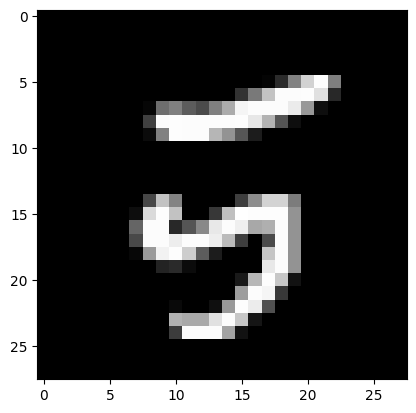

In [29]:
test_prediction(np.random.randint(0,41000), W1,b1,W2,b2,W3,b3)